Don't forget to run IRkernel::installspec() in R in order to let the jupyter recongize the R kernel before running the notebook.


## Visualisation of HTODemux result


In [1]:
library(data.table)
library(plyr)
library(Seurat)
library(ggplot2)
library(repr)
library(stringr)


Lade n"otiges Paket: SeuratObject

Lade n"otiges Paket: sp

'SeuratObject' was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attache Paket: 'SeuratObject'


Das folgende Objekt ist maskiert 'package:base':

    intersect




In [2]:
# Use Myriad Pro for visualisation
library(extrafont)
font_import(paths = "/Library/Fonts", prompt = FALSE)
loadfonts()
fonts()


Registering fonts with R

Scanning ttf files in /Library/Fonts ...

Extracting .afm files from .ttf files...

/System/Library/Fonts/Supplemental/Arial Unicode.ttf
 : ArialUnicodeMS already registered in fonts database. Skipping.

/Library/Fonts/FontsFree-Net-MYRIADPRO-REGULAR.ttf
 : MyriadPro-Regular already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/extrafontdb/metrics

Arial Unicode MS already registered with pdfFont().

Myriad Pro already registered with pdfFont().

Arial Unicode MS already registered with postscriptFont().

Myriad Pro already registered with postscriptFont().



[1] "Arial Unicode MS" "Myriad Pro"

In [3]:
# Set theme
plot_theme <- function() {
  theme_bw() + theme(
    panel.border = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    text = element_text(size = 24, family = "Myriad Pro"),
    axis.text = element_text(size = 26),
    axis.title = element_text(size = 30),
    legend.text = element_text(size = 24),
    legend.title = element_text(size = 26),
    legend.key.size = unit(0.8, "cm"),
    plot.title = element_text(size = 30, hjust = 0.5),
    axis.line = element_line(linewidth = 0.7, colour = "black"),
    plot.margin = margin(
      t = 1,
      b = 0.1,
      r = 0.3,
      l = 0.6,
      "cm"
    )
  )
}
options(repr.plot.width = 10, repr.plot.height = 9)


In [4]:
# Load htodemux result from an rds object
htodemux_gx12 <- readRDS("../data/pipeline_output/gx12/htodemux.rds")


### UMAP plot


In [5]:
# Rename features
htodemux_gx12@assays$HTO@counts@Dimnames[[1]] <-
    paste0("Hash45", 1:6)
rownames(htodemux_gx12@assays$HTO@data) <- paste0("Hash45", 1:6)
rownames(htodemux_gx12@assays$HTO@meta.features) <-
    paste0("Hash45", 1:6)
htodemux_gx12 <- RenameIdents(
    htodemux_gx12,
    "Hash453-TotalSeqA" = "Hash453",
    "Hash451-TotalSeqA" = "Hash451",
    "Hash452-TotalSeqA" = "Hash452",
    "Hash454-TotalSeqA" = "Hash454",
    "Hash455-TotalSeqA" = "Hash455",
    "Hash456-TotalSeqA" = "Hash456"
)

# Subset the object, remove negative droplets
htodemux_gx12_subset <- subset(htodemux_gx12,
    idents = "Negative", invert = TRUE
)

# Calculate a UMAP embedding of the HTO data
DefaultAssay(htodemux_gx12_subset) <- "HTO"
htodemux_gx12_subset <- ScaleData(
    htodemux_gx12_subset,
    features = rownames(htodemux_gx12_subset),
    verbose = FALSE
)
htodemux_gx12_subset <- RunPCA(
    htodemux_gx12_subset,
    features = rownames(htodemux_gx12_subset),
    approx = FALSE
)
htodemux_gx12_subset <- RunUMAP(htodemux_gx12_subset, dims = 1:6)


Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
Warning message:
"Requested number is larger than the number of available items (6). Setting to 6."
PC_ 1 
Positive:  Hash453, Hash452, Hash451 
Negative:  Hash454, Hash455, Hash456 
PC_ 2 
Positive:  Hash456, Hash455, Hash454 
Negative:  Hash452, Hash451, Hash453 
PC_ 3 
Positive:  Hash451, Hash454, Hash456 
Negative:  Hash452, Hash453, Hash455 
PC_ 4 
Positive:  Hash456, Hash454, Hash453 
Negative:  Hash455, Hash451, Hash452 
PC_ 5 
Positive:  Hash453, Hash454, Hash455 
Negative:  Hash452, Hash451, Hash456 

Warning message:
"The default method for RunUMAP has changed from calling Python UMA

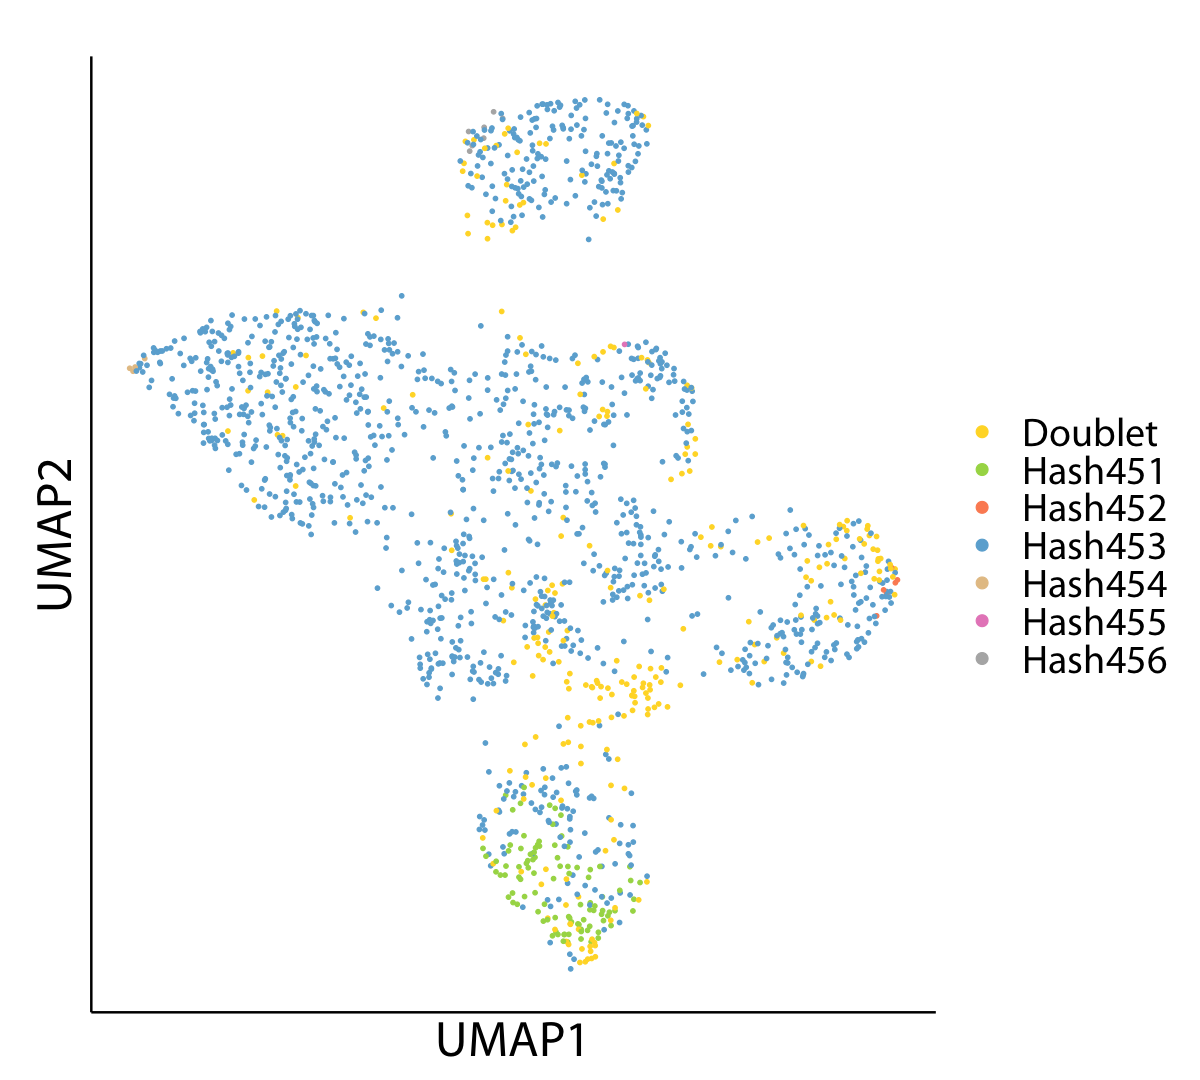

In [6]:
DimPlot(htodemux_gx12_subset, reduction = "umap") +
  scale_colour_manual(
    values = c(
      "#FFD92F",
      "#A6D854",
      "#FC8D62",
      "#6BAED6",
      "#E5C494",
      "#E78AC3",
      "#B3B3B3"
    ),
    limits = c("Doublet", paste0("Hash45", 1:6)),
    labels = c("Doublet", paste0("Hash45", 1:6))
  ) +
  plot_theme() + xlab("UMAP1") + ylab("UMAP2") + theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
  )


### Violin plot


In [7]:
# raw counts
counts_raw <- melt(t(as.matrix(htodemux_gx12[["HTO"]]@counts)))
colnames(counts_raw) <- c("Cell", "Hashtag", "Expression")
head(counts_raw)


Warning message in melt(t(as.matrix(htodemux_gx12[["HTO"]]@counts))):
"The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(t(as.matrix(htodemux_gx12[["HTO"]]@counts))). In the next version, this warning will become an error."


,Cell,Hashtag,Expression
,<fct>,<fct>,<dbl>
1,AAACCCAAGGTGTGAC-1,Hash451,208
2,AAACCCAGTGAGAGGG-1,Hash451,148
3,AAACGAAAGAATCTAG-1,Hash451,208
4,AAACGAACACATATGC-1,Hash451,190
5,AAACGAACACGACTAT-1,Hash451,203
6,AAACGAACATCAGCAT-1,Hash451,191


In [8]:
# Slop value extracted from htodemux
cutoff <- data.frame(
    Hashtag = paste0("Hash45", 1:6),
    slope_value = c(311, 121, 596, 10, 32, 98)
)
cutoff$Hashtag <- as.factor(cutoff$Hashtag)
cutoff


Hashtag,slope_value
<fct>,<dbl>
Hash451,311
Hash452,121
Hash453,596
Hash454,10
Hash455,32
Hash456,98


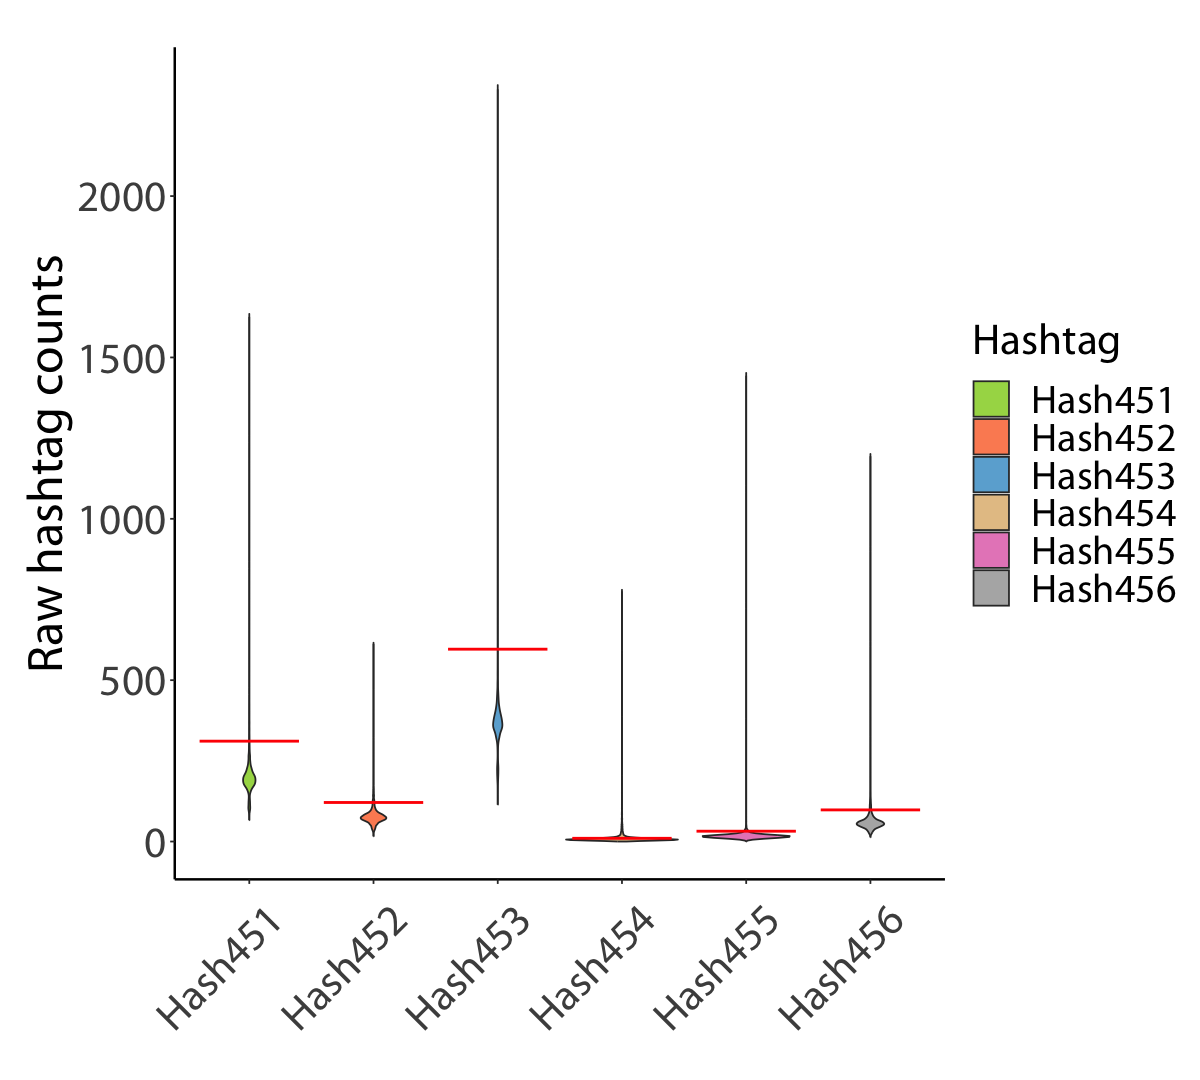

In [9]:
ggplot(counts_raw) +
  geom_violin(aes(x = Hashtag, y = Expression, fill = Hashtag)) +
  xlab("") +
  ylab("Raw hashtag counts") +
  scale_fill_manual(values = c(
    "#A6D854",
    "#FC8D62",
    "#6BAED6",
    "#E5C494",
    "#E78AC3",
    "#B3B3B3"
  )) +
  geom_segment(
    data = cutoff,
    inherit.aes = FALSE,
    colour = "red",
    linewidth = 0.8,
    aes(
      x = as.numeric(Hashtag) - 0.4,
      xend = as.numeric(Hashtag) + 0.4,
      yend = slope_value,
      y = slope_value
    )
  ) +
  plot_theme() +
  theme(axis.text.x = element_text(
    angle = 45,
    hjust = 0.8,
    vjust = 0.7
  ))


## Visualisation of hashing deconvolution results


In [10]:
# Load hashing deconvolution results
hash_gx12_classi <-
    fread("../data/pipeline_output/gx12/hash_classification_all.csv",
        na.strings = ""
    )
# Remove doublet detection method solo
hash_gx12_classi <- hash_gx12_classi[, -7]
# Remove the trial ID
colnames(hash_gx12_classi) <-
    c(
        "Barcode",
        "DemuxEM",
        "HashedDrops",
        "HashSolo",
        "HTODemux",
        "Multiseq",
        "GMM-Demux",
        "BFF"
    )

# Subset by only those cells detected by RNA
white_list_gx12 <-
    fread("../data/dataset/barcodes_gx12.tsv", header = FALSE)$V1
hash_gx12_classi <- hash_gx12_classi[Barcode %in% white_list_gx12, ]

head(hash_gx12_classi)


Barcode,DemuxEM,HashedDrops,HashSolo,HTODemux,Multiseq,GMM-Demux,BFF
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGGTGTGAC-1,singlet,negative,singlet,singlet,singlet,negative,doublet
AAACCCAGTGAGAGGG-1,singlet,NA,singlet,negative,doublet,negative,doublet
AAACGAAAGAATCTAG-1,negative,negative,singlet,negative,negative,negative,doublet
AAACGAACACATATGC-1,singlet,negative,singlet,negative,negative,negative,doublet
AAACGAACACGACTAT-1,singlet,negative,singlet,singlet,singlet,negative,doublet
AAACGAACATCAGCAT-1,negative,negative,singlet,singlet,negative,negative,doublet


In [11]:
# Reorder the result
summary_hash_gx12 <- melt(
    hash_gx12_classi,
    id.vars = "Barcode",
    variable.name = "Method",
    value.name = "Classification"
)
summary_hash_gx12 <- na.omit(summary_hash_gx12)
summary_hash_gx12 <- as.data.frame(table(summary_hash_gx12[, -1]))
colnames(summary_hash_gx12)[3] <- "Count"
summary_hash_gx12 <-
    summary_hash_gx12[order(summary_hash_gx12$Classification,
        decreasing = TRUE
    ), ]

head(summary_hash_gx12)


,Method,Classification,Count
,<fct>,<fct>,<int>
15,DemuxEM,singlet,1812
16,HashedDrops,singlet,32
17,HashSolo,singlet,4686
18,HTODemux,singlet,1402
19,Multiseq,singlet,1853
20,GMM-Demux,singlet,0


In [12]:
# Determine the y-axis position of labels ylab_pos
summary_hash_gx12_cumsum <- ddply(summary_hash_gx12,
    "Method",
    transform,
    label_ypos = cumsum(Count) - 0.5 * Count + 40
)

# Modify the ylab_pos manually
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method == "HashSolo" &
    summary_hash_gx12_cumsum$Classification == "doublet", ]$label_ypos <-
    4770
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method == "HashSolo" &
    summary_hash_gx12_cumsum$Classification == "negative", ]$label_ypos <-
    4550
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method == "HTODemux" &
    summary_hash_gx12_cumsum$Classification == "doublet", ]$label_ypos <-
    4750
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Method == "HashedDrops" &
    summary_hash_gx12_cumsum$Classification == "singlet", ]$label_ypos <-
    80
# Avoid showing count 0
summary_hash_gx12_cumsum[summary_hash_gx12_cumsum$Count == 0, ]$label_ypos <-
    NA

# Rename classification
summary_hash_gx12_cumsum$Classification <-
    str_to_title(summary_hash_gx12_cumsum$Classification)

# Sort methods
summary_hash_gx12_cumsum$Method <-
    factor(
        summary_hash_gx12_cumsum$Method,
        levels = c(
            "BFF",
            "DemuxEM",
            "GMM-Demux",
            "HashedDrops",
            "HashSolo",
            "HTODemux",
            "Multiseq"
        )
    )
summary_hash_gx12_cumsum


Method,Classification,Count,label_ypos
<fct>,<chr>,<int>,<dbl>
DemuxEM,Singlet,1812,946.0
DemuxEM,Negative,2262,2983.0
DemuxEM,Doublet,815,4521.5
HashedDrops,Singlet,32,80.0
HashedDrops,Negative,4016,2080.0
HashedDrops,Doublet,0,NA
HashSolo,Singlet,4686,2383.0
HashSolo,Negative,1,4550.0
HashSolo,Doublet,202,4770.0


Warning message:
"Removed 3 rows containing missing values (`geom_text()`)."


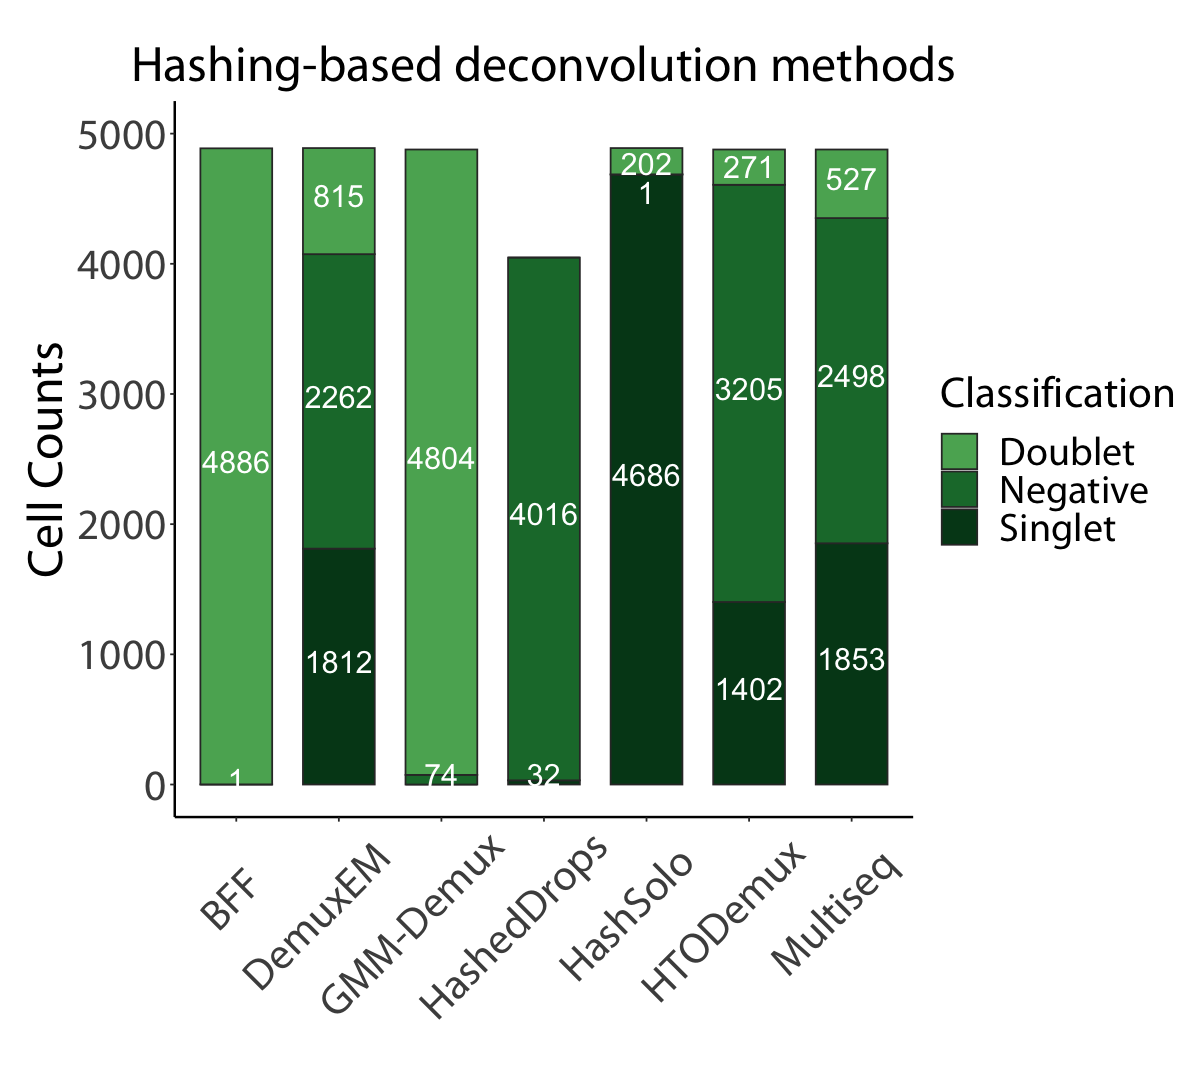

In [13]:
# Barplot
ggplot(
  summary_hash_gx12_cumsum,
  aes(x = Method, y = Count, fill = Classification)
) +
  geom_bar(
    stat = "identity",
    width = 0.7,
    color = "grey20"
  ) +
  scale_fill_manual(values = c("#5AAE61", "#1B7837", "#00441B")) +
  plot_theme() +
  xlab("") +
  ylim(0, 5000) +
  ylab("Cell Counts") +
  geom_text(
    aes(y = label_ypos, label = Count),
    vjust = 0.5,
    color = "white",
    size = 6.5
  ) +
  theme(axis.text.x = element_text(
    angle = 45,
    hjust = 0.7,
    vjust = 0.7
  )) +
  ggtitle("Hashing-based deconvolution methods")


## Visualisation of genetic deconvolution results


In [14]:
# Load genetic demultiplexing results
gene_gx12_classi <-
    fread("../data/pipeline_output/gx12/genetic_classification_all.csv")

# Remove the trial ID
colnames(gene_gx12_classi) <-
    c("Barcode", "Freemuxlet", "scSplit", "Souporcell", "Vireo")

# Reorder the result
summary_gene_gx12 <- melt(
    gene_gx12_classi,
    id.vars = "Barcode",
    variable.name = "Method",
    value.name = "Classification"
)
summary_gene_gx12 <- na.omit(summary_gene_gx12)
summary_gene_gx12 <- as.data.frame(table(summary_gene_gx12[, -1]))
colnames(summary_gene_gx12)[3] <- "Count"
summary_gene_gx12 <-
    summary_gene_gx12[order(summary_gene_gx12$Classification, decreasing = T), ]
head(summary_gene_gx12)


,Method,Classification,Count
,<fct>,<fct>,<int>
9,Freemuxlet,singlet,4590
10,scSplit,singlet,4445
11,Souporcell,singlet,4465
12,Vireo,singlet,4377
5,Freemuxlet,negative,7
6,scSplit,negative,0


In [15]:
# Determine the y-axis position of labels ylab_pos
summary_gene_gx12_cumsum <-
    ddply(summary_gene_gx12,
        "Method",
        transform,
        label_ypos = cumsum(Count) - 0.5 * Count + 40
    )

# Avoid showing count 0
summary_gene_gx12_cumsum[summary_gene_gx12_cumsum$Count == 0, ]$label_ypos <- NA

# Modify the ylab_pos manually
summary_gene_gx12_cumsum[summary_gene_gx12_cumsum$Method == "Freemuxlet" &
    summary_gene_gx12_cumsum$Classification == "negative", ]$label_ypos <- 4500

# Rename classification
summary_gene_gx12_cumsum$Classification <-
    str_to_title(summary_gene_gx12_cumsum$Classification)


Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


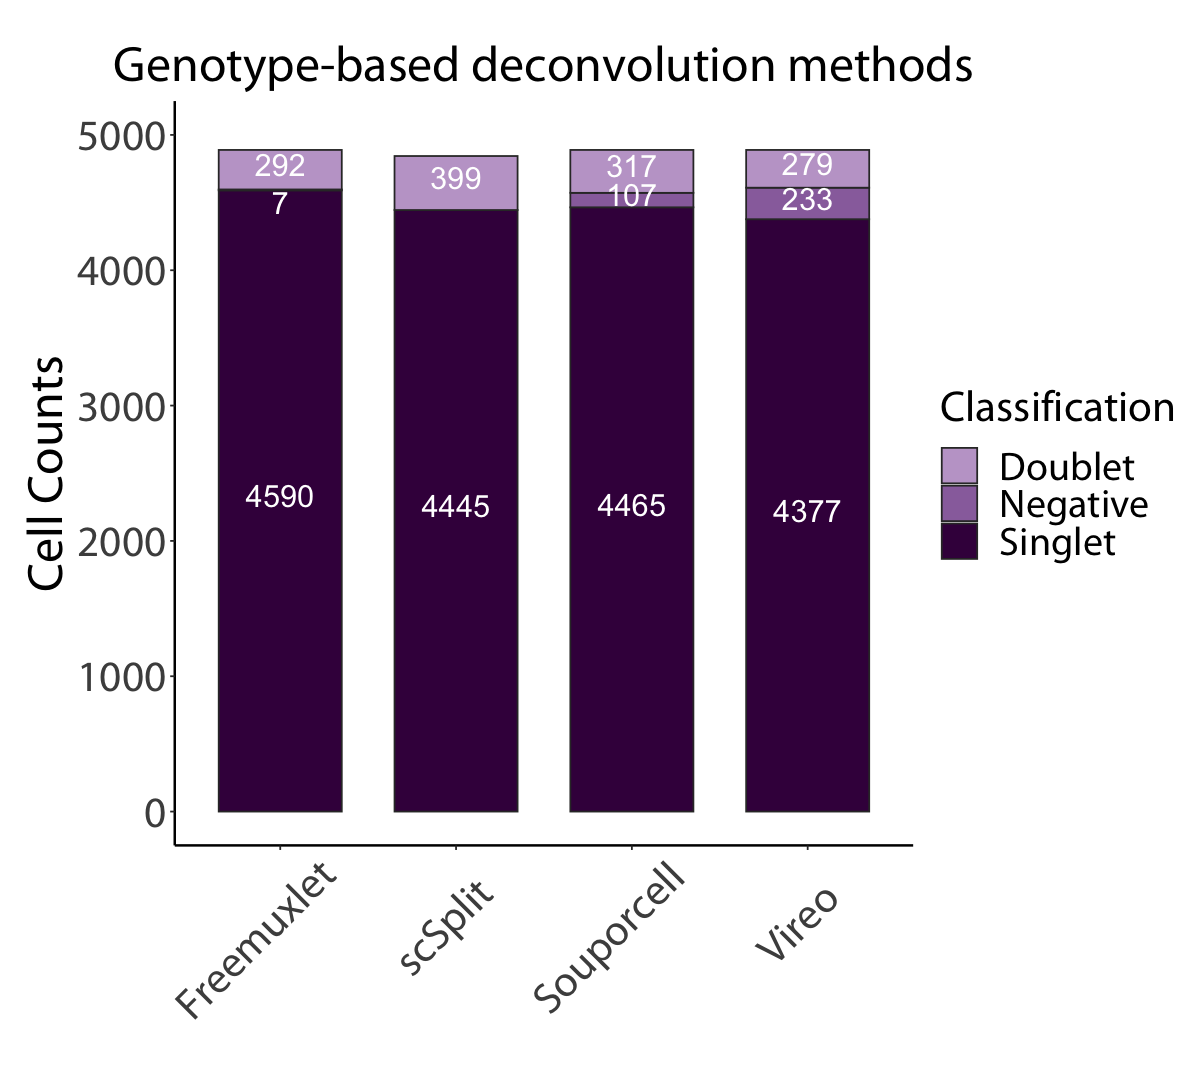

In [16]:
# Barplot
ggplot(
  summary_gene_gx12_cumsum,
  aes(x = Method, y = Count, fill = Classification)
) +
  geom_bar(
    stat = "identity",
    width = 0.7,
    colour = "grey20"
  ) +
  scale_fill_manual(values = c("#C2A5CF", "#9970AB", "#40004B")) +
  plot_theme() +
  xlab("") +
  ylim(0, 5000) +
  ylab("Cell Counts") +
  geom_text(
    aes(y = label_ypos, label = Count),
    vjust = 0.5,
    color = "white",
    size = 6.5
  ) +
  theme(axis.text.x = element_text(
    angle = 45,
    hjust = 0.7,
    vjust = 0.7
  )) +
  ggtitle("Genotype-based deconvolution methods")


For formatting, align the plots to make them in the same size.


In [17]:
library(cowplot)
fig1 <- DimPlot(htodemux_gx12_subset, reduction = "umap") +
    scale_colour_manual(
        values = c(
            "#FFD92F",
            "#A6D854",
            "#FC8D62",
            "#6BAED6",
            "#E5C494",
            "#E78AC3",
            "#B3B3B3"
        ),
        limits = c("Doublet", paste0("Hash45", 1:6)),
        labels = c("Doublet", paste0("Hash45", 1:6))
    ) +
    plot_theme() + xlab("UMAP1") + ylab("UMAP2") + theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )

fig2 <- ggplot(counts_raw) +
    geom_violin(aes(x = Hashtag, y = Expression, fill = Hashtag)) +
    xlab("") +
    ylab("Raw hashtag counts") +
    scale_fill_manual(values = c(
        "#A6D854",
        "#FC8D62",
        "#6BAED6",
        "#E5C494",
        "#E78AC3",
        "#B3B3B3"
    )) +
    geom_segment(
        data = cutoff,
        inherit.aes = FALSE,
        colour = "red",
        linewidth = 0.8,
        aes(
            x = as.numeric(Hashtag) - 0.4,
            xend = as.numeric(Hashtag) + 0.4,
            yend = slope_value,
            y = slope_value
        )
    ) +
    plot_theme() +
    theme(axis.text.x = element_text(
        angle = 45,
        hjust = 0.8,
        vjust = 0.7
    ))

fig3 <- ggplot(
    summary_hash_gx12_cumsum,
    aes(x = Method, y = Count, fill = Classification)
) +
    geom_bar(
        stat = "identity",
        width = 0.7,
        color = "grey20"
    ) +
    scale_fill_manual(values = c("#5AAE61", "#1B7837", "#00441B")) +
    plot_theme() +
    xlab("") +
    ylim(0, 5000) +
    ylab("Cell Counts") +
    geom_text(
        aes(y = label_ypos, label = Count),
        vjust = 0.5,
        color = "white",
        size = 6.5
    ) +
    theme(axis.text.x = element_text(
        angle = 45,
        hjust = 0.7,
        vjust = 0.7
    )) +
    ggtitle("Hashing-based deconvolution methods")

fig4 <- ggplot(
    summary_gene_gx12_cumsum,
    aes(x = Method, y = Count, fill = Classification)
) +
    geom_bar(
        stat = "identity",
        width = 0.7,
        colour = "grey20"
    ) +
    scale_fill_manual(values = c("#C2A5CF", "#9970AB", "#40004B")) +
    plot_theme() +
    xlab("") +
    ylim(0, 5000) +
    ylab("Cell Counts") +
    geom_text(
        aes(y = label_ypos, label = Count),
        vjust = 0.5,
        color = "white",
        size = 6.5
    ) +
    theme(axis.text.x = element_text(
        angle = 45,
        hjust = 0.7,
        vjust = 0.7
    )) +
    ggtitle("Genotype-based deconvolution methods")


In [18]:
upperplot <- align_plots(fig1, fig2, align = "h", axis = "bt")
barplot <- align_plots(fig3, fig4, align = "h")


Warning message:
"Removed 3 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."
